In [37]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization
import missingno as msno
# %matplotlib inline

In [30]:
#Importando y mostrando los datos
data = pd.read_csv("games.csv")
print(data.shape)
data.head()

(51490, 61)


,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18


* Para comenzar, es importante detectar los juegos que tuvieron REMAKE y que por lo tanto no se debería tomar en cuenta para éste análisis suponiendo que la predicción esperada será para partidas con una duración promedio de más de 20 minutos

In [29]:
#Seleccionamos las partidas donde la duración sea de menos de 240 segundos, o sea, 4 minutos
data_duration=data[(data["gameDuration"]<300)]
data_duration.shape

(1195, 61)

In [33]:
data= data[(data["gameDuration"]>300)]
data.shape

(50295, 61)

* Como se puede observar, existen 1195 partidas de ésta índole

In [34]:
data.columns.values

array(['gameId', 'creationTime', 'gameDuration', 'seasonId', 'winner',
       'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1',
       't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1',
       't1_champ2_sum2', 't1_champ3id', 't1_champ3_sum1',
       't1_champ3_sum2', 't1_champ4id', 't1_champ4_sum1',
       't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1',
       't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills',
       't1_baronKills', 't1_dragonKills', 't1_riftHeraldKills', 't1_ban1',
       't1_ban2', 't1_ban3', 't1_ban4', 't1_ban5', 't2_champ1id',
       't2_champ1_sum1', 't2_champ1_sum2', 't2_champ2id',
       't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id',
       't2_champ4_sum1', 't2_champ4_sum2', 't2_champ5id',
       't2_champ5_sum1', 't2_champ5_sum2', 't2_towerKills',
       't2_inhibitorKills', 't2_baronKills', 't2_dragonKills

In [35]:
data=data[["winner","firstBlood","firstTower","firstInhibitor","firstBaron","firstDragon","firstRiftHerald","t1_towerKills","t1_inhibitorKills",'t1_baronKills',
       't1_dragonKills','t2_towerKills','t2_inhibitorKills', 't2_baronKills', 't2_dragonKills'
       ]]

In [36]:
data.head()

,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills
0,1,2,1,1,1,1,2,11,1,2,3,5,0,0,1
1,1,1,1,1,0,1,1,10,4,0,2,2,0,0,0
2,1,2,1,1,1,2,0,8,1,1,1,2,0,0,1
3,1,1,1,1,1,1,0,9,2,1,2,0,0,0,0
4,1,2,1,1,1,1,0,9,2,1,3,3,0,0,1


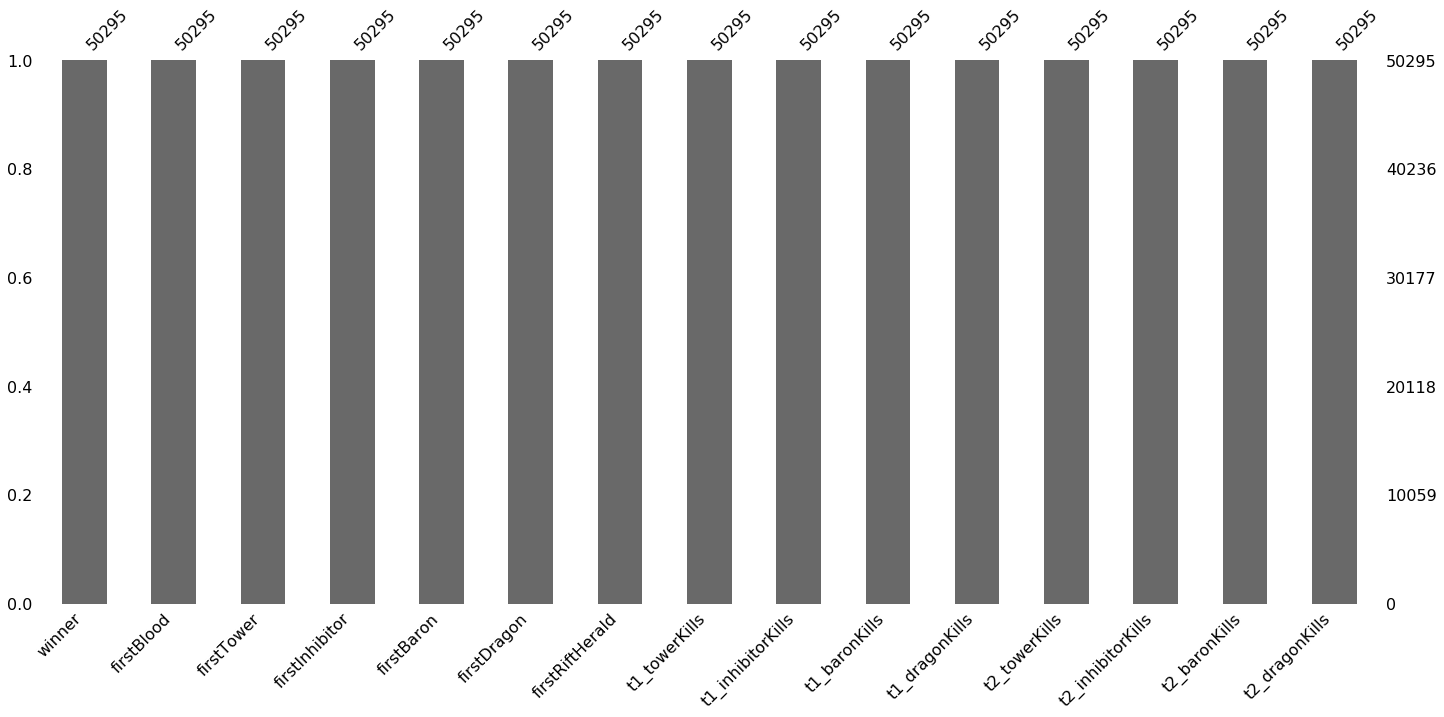

In [38]:
msno.bar(data)
plt.show()

In [39]:
primer_equipo=data[data.winner==1]
segundo_equipo=data[data.winner==2]